<a href="https://colab.research.google.com/github/alinemls/datasets/blob/main/Iris_Decision_Tree_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Iris com Decision Tree

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from scipy.stats import randint
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, cohen_kappa_score as kappa, confusion_matrix

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/webalysson/datasets/main/Iris.csv')
df.head(5)

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.drop(labels=['Id'], axis=1, inplace=True, errors='ignore')

In [ ]:
df.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Agrupamento pela identificação completa da planta
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Contrução do Modelo

In [ ]:
# definir qual dataset será usado
dataset_model = df.copy()

In [ ]:
X = dataset_model.drop(columns=['Species']).values

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
# Transformação do atributo categórico em numérico
le = preprocessing.LabelEncoder()
le.fit(dataset_model.Species)
y = le.transform(dataset_model['Species'].values)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 50, 1: 50, 2: 50}

In [ ]:
# Dividindo o dataset em subconjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print('X_train =>',X_train.shape)
print('X_test =>',X_test.shape)
print('Y_train =>',y_train.shape)
print('Y_test =>',y_test.shape)

X_train => (105, 4)
X_test => (45, 4)
Y_train => (105,)
Y_test => (45,)


In [ ]:
# Modelo com DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion='entropy')
clf_dt = clf_dt.fit(X_train, y_train)
y_predict_train = clf_dt.predict(X_train)
y_predict_test = clf_dt.predict(X_test)

In [ ]:
X_test

array([[4.8, 3.4, 1.9, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [7. , 3.2, 4.7, 1.4],
       [5. , 3.6, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5.6, 3. , 4.5, 1.5],
       [7.9, 3.8, 6.4, 2. ],
       [5.7, 2.5, 5. , 2. ],
       [5.8, 2.7, 5.1, 1.9],
       [5.1, 3.3, 1.7, 0.5],
       [5.8, 2.7, 5.1, 1.9],
       [6.3, 2.3, 4.4, 1.3],
       [4.9, 2.5, 4.5, 1.7],
       [6.7, 3.1, 5.6, 2.4],
       [6.7, 3.1, 4.4, 1.4],
       [5.1, 3.7, 1.5, 0.4],
       [6.7, 3.3, 5.7, 2.1],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.6, 2.7, 4.2, 1.3],
       [6.3, 2.8, 5.1, 1.5],
       [5.6, 2.8, 4.9, 2. ],
       [7.6, 3. , 6.6, 2.1],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 3.8, 1.6, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [6.6, 2.9, 4.6, 1.3],
       [5. , 2. , 3.5, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.5, 1.3, 0.3],
       [6.1, 3. , 4.6, 1.4],
       [5. , 3. , 1.6, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [5.6, 3. , 4.1, 1.3],
       [6. , 3

In [ ]:
y_predict_all = clf_dt.predict(X)

In [ ]:
df['y'] = y_predict_all

In [ ]:
df.head(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,y
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


In [ ]:
df.groupby('y').size()

y
0    50
1    54
2    46
dtype: int64

In [ ]:
# Checando a acurácia manualmente
print("Acurácia manual: %.2f" % np.mean(y_predict_test == y_test))

Acurácia manual: 0.91


In [ ]:
# Avaliação
accuracy = metrics.accuracy_score(y_test, y_predict_test)
print("DecisionTree")
print("Accuracy: %.2f" % (accuracy))
#print("Coeficiente de Kappa: %.2f" % (kappa(y_test, clf_dt.predict(X_test))) )
#print("F1 Score train: %.2f" % f1_score(y_train, y_predict_train))
#print("F1 Score test: %.2f" % f1_score(y_test, y_predict_test))

DecisionTree
Accuracy: 0.91


(<Figure size 864x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f11a4db3e10>)

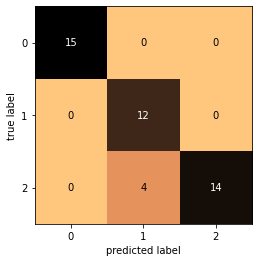

In [ ]:
# Gerar a matrix de confusão NxN
conf_mat = confusion_matrix(y_test, y_predict_test)
plot_confusion_matrix(conf_mat,figsize=(12,4),cmap='copper_r')

In [ ]:
#!pip install mlxtend --upgrade

[Text(0.4, 0.9, 'Petal_Length <= 2.45\nentropy = 1.581\nsamples = 105\nvalue = [35, 38, 32]\nclass = Iris-setosa'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.7, 'Petal_Length <= 4.95\nentropy = 0.995\nsamples = 70\nvalue = [0, 38, 32]\nclass = Iris-setosa'),
 Text(0.2, 0.5, 'Petal_Width <= 1.7\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]\nclass = Iris-setosa'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Iris-setosa'),
 Text(0.3, 0.3, 'Sepal_Length <= 6.0\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-setosa'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-setosa'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-setosa'),
 Text(0.8, 0.5, 'Petal_Width <= 1.75\nentropy = 0.33\nsamples = 33\nvalue = [0, 2, 31]\nclass = Iris-setosa'),
 Text(0.7, 0.3, 'Petal_Width <= 1.55\nentropy = 1.0\nsamples = 4\nvalue = [0, 2, 2]\ncla

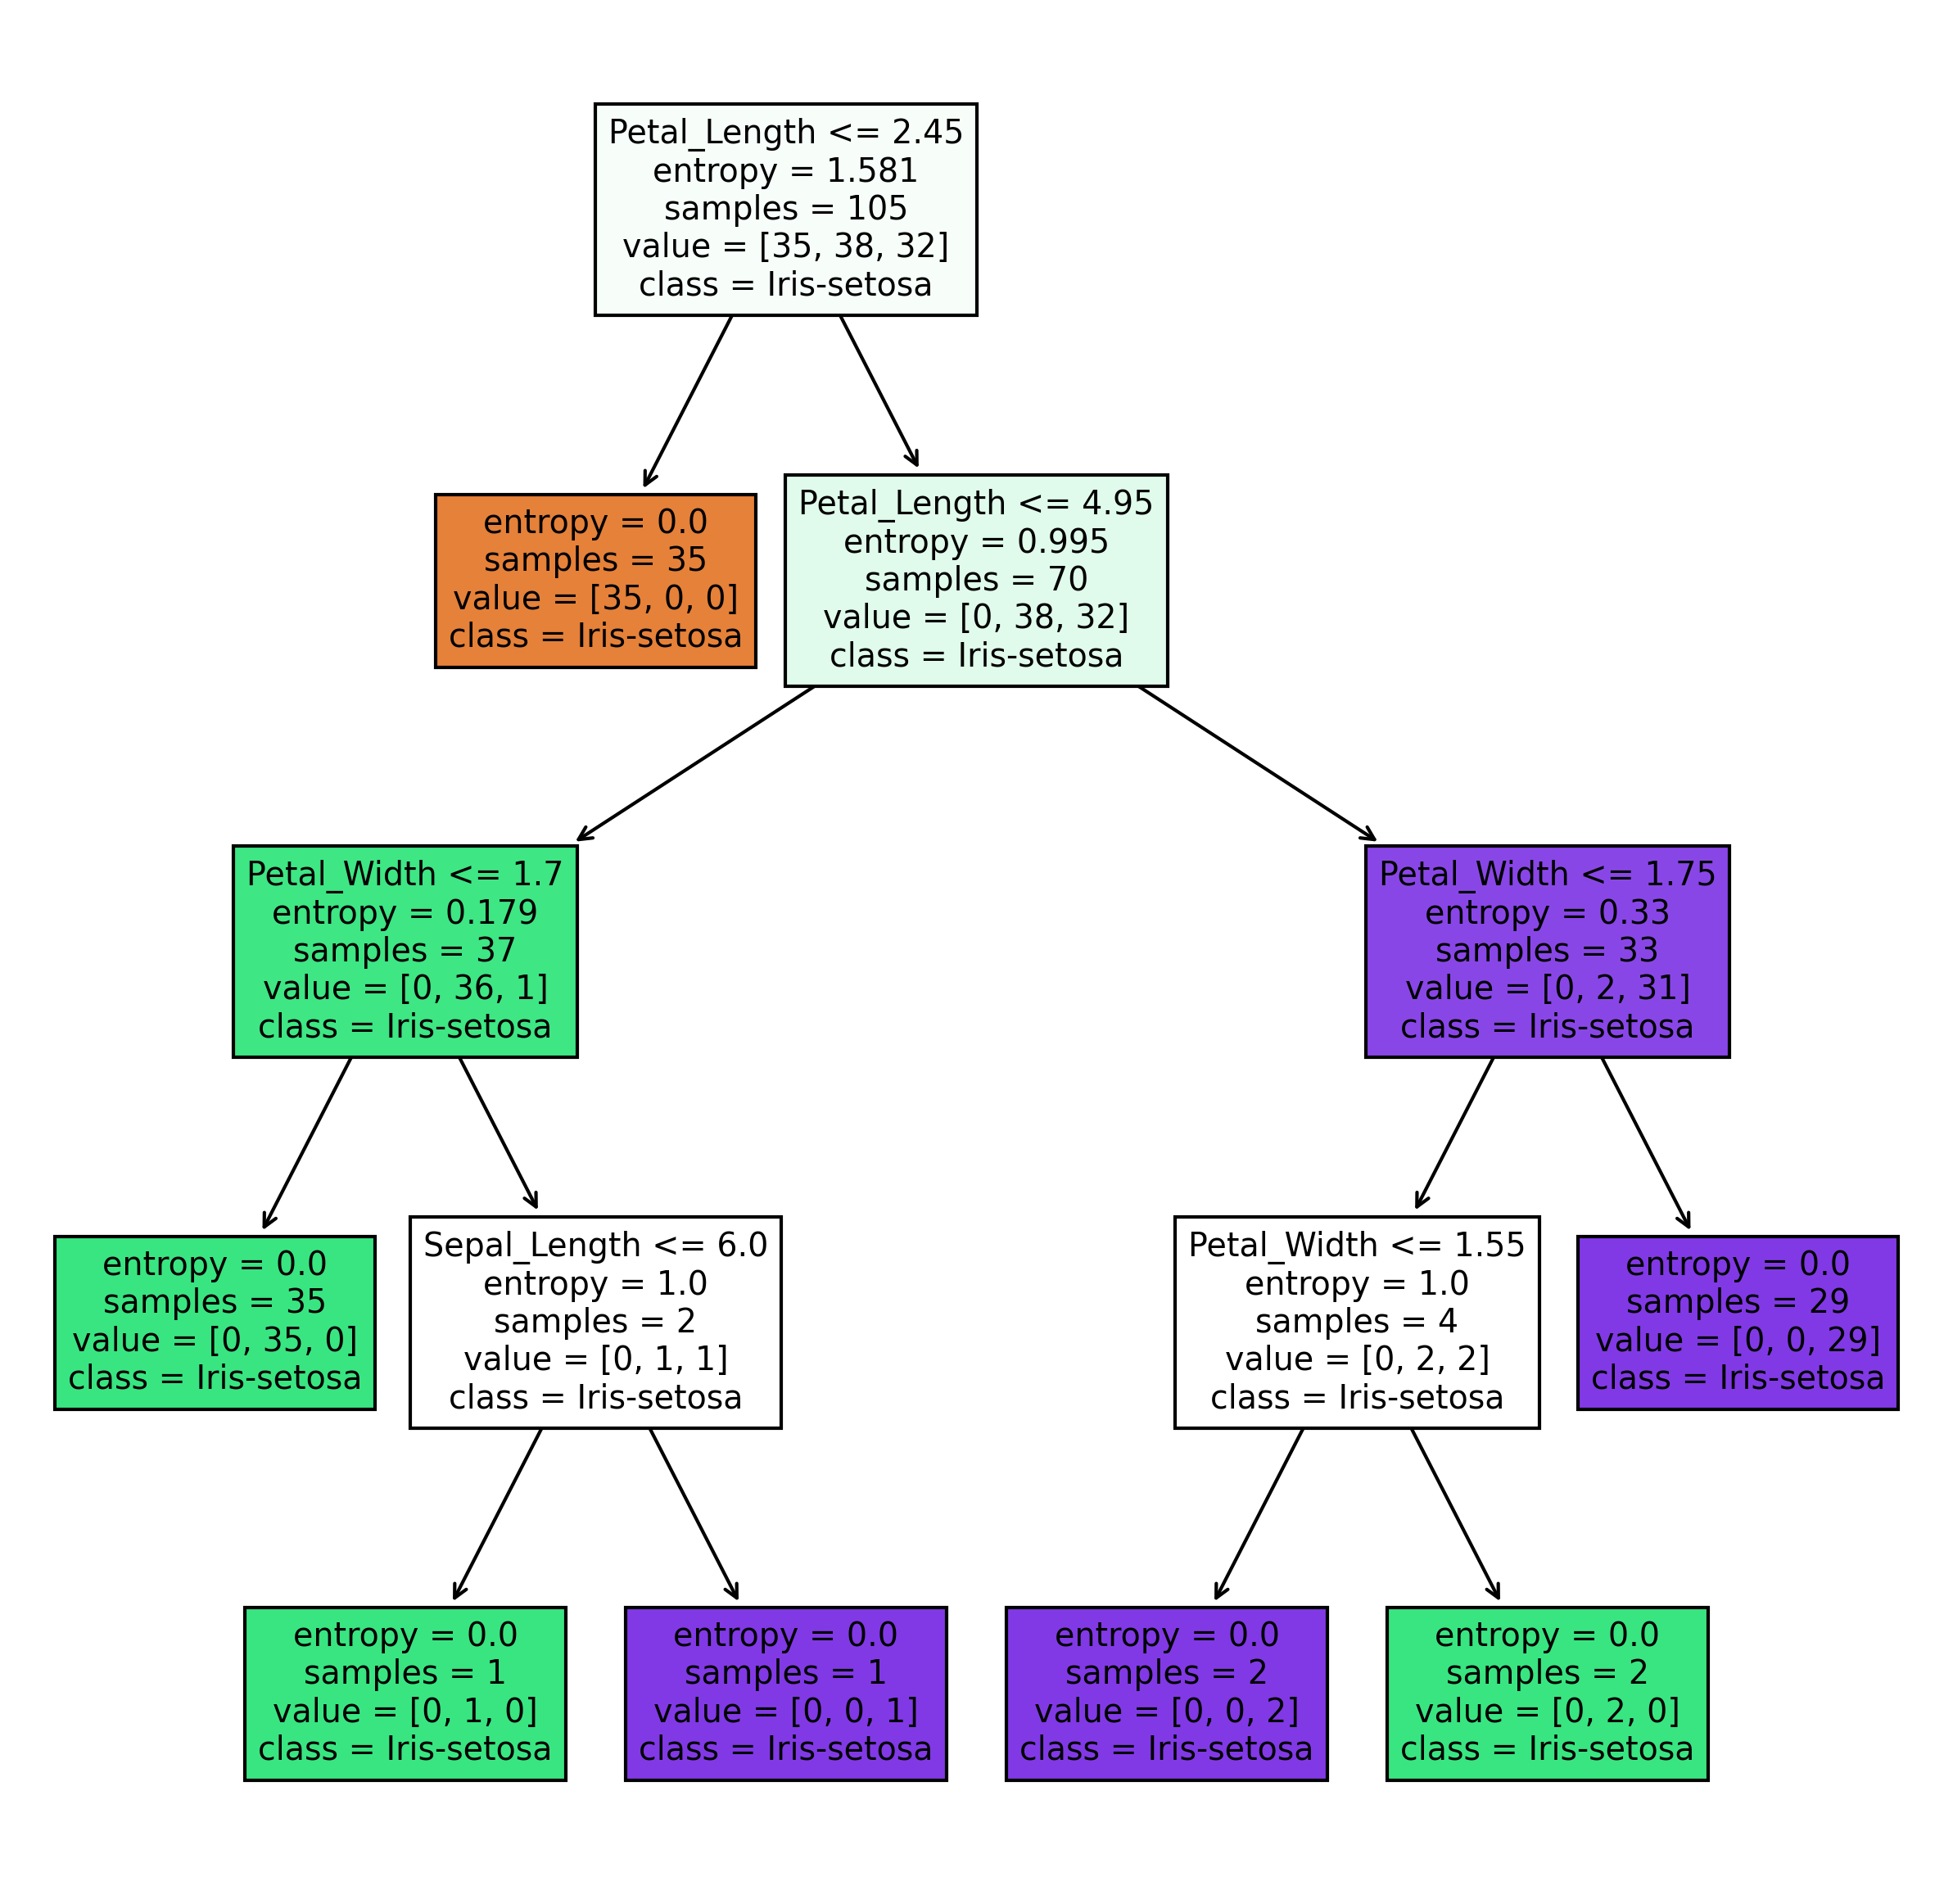

In [ ]:
# Gerar a árvore para exibição

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(clf_dt,
               feature_names = df.columns, 
               #class_names=['a','b'],
               class_names=df.Species,
               filled = True
               )
# fig.savefig('tree.png')


In [ ]:
!pip install graphviz

In [ ]:
import graphviz

In [ ]:
dataset_model.columns.drop('Species')

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'], dtype='object')

In [ ]:
dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                      feature_names=dataset_model.columns.drop('Species'),  
                      class_names=df.Species,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
# graph
graph.render(filename="iris", view=True, format='png')

'iris.png'

In [ ]:
from sklearn.tree import export_text
r = export_text(clf_dt, feature_names=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
print(r)

|--- Petal_Length <= 2.45
|   |--- class: 0
|--- Petal_Length >  2.45
|   |--- Petal_Length <= 4.95
|   |   |--- Petal_Width <= 1.70
|   |   |   |--- class: 1
|   |   |--- Petal_Width >  1.70
|   |   |   |--- Sepal_Length <= 6.00
|   |   |   |   |--- class: 1
|   |   |   |--- Sepal_Length >  6.00
|   |   |   |   |--- class: 2
|   |--- Petal_Length >  4.95
|   |   |--- Petal_Width <= 1.75
|   |   |   |--- Petal_Width <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- Petal_Width >  1.55
|   |   |   |   |--- class: 1
|   |   |--- Petal_Width >  1.75
|   |   |   |--- class: 2



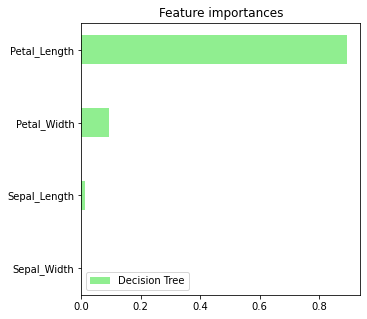

In [ ]:
# Feature importances

feature_importance=pd.DataFrame({
    #'rfc':clf_rf.feature_importances_,
    'dt':clf_dt.feature_importances_
},index=dataset_model.drop(columns=['Species']).columns)
feature_importance.sort_values(by='dt',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(5,5))
#rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)
ax.set_title("Feature importances")
ax.legend()
plt.show()
